In [1]:
from numpy.array_api import bitwise_invert

from ScoringPy import Metrics
import pandas as pd
import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import unittest
from unittest.mock import MagicMock

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Simulate data
n_samples = 1000
data = pd.DataFrame({
    'Scores': np.random.uniform(300, 850, size=n_samples),  # Credit scores
    'Actual': np.random.choice([0, 1], size=n_samples, p=[0.3, 0.7]),  # Target: 1 (good), 0 (bad)
    'Date': [datetime.now() - timedelta(days=i) for i in range(n_samples)]  # Random dates
})

# Display the first few rows of the data
data.head()


,Scores,Actual,Date
0,505.997065,0,2025-01-23 00:15:52.094056
1,822.892869,1,2025-01-22 00:15:52.094056
2,702.596668,1,2025-01-21 00:15:52.094056
3,629.262166,1,2025-01-20 00:15:52.094056
4,385.810252,1,2025-01-19 00:15:52.094056


In [3]:
# Initialize the Metrics class
metrics = Metrics(
    Credit_score='Scores',
    Target='Actual',
    Date_column='Date',
    Positive_Target=1,
    Negative_Target=0,
    Data_path='./',  # Adjust the path as needed
    Plot_path='./'   # Adjust the path as needed
)


In [4]:
# Test the cutoff method with a 50% approval rate
cutoff_metrics = metrics.cutoff(data, approved_Rate=50, display=True)

# Display the result
cutoff_metrics


Cutoff Score: 573.0
Good Percentage Among Approved: 71.86%
Bad Percentage Among Approved: 28.14%
Approval Rate: 50.1%


(573.00143596068, 71.86, 28.14, 50.1, 31.06)

In [11]:
# Generate the cutoff report
cutoff_report = metrics.cutoff_report(data, step=10, save=False)


C:\Users\Dell XPS\Desktop\ScoringPy\ScoringPy\module.py:1077: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = Data.groupby('Bin').agg(
C:\Users\Dell XPS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell XPS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


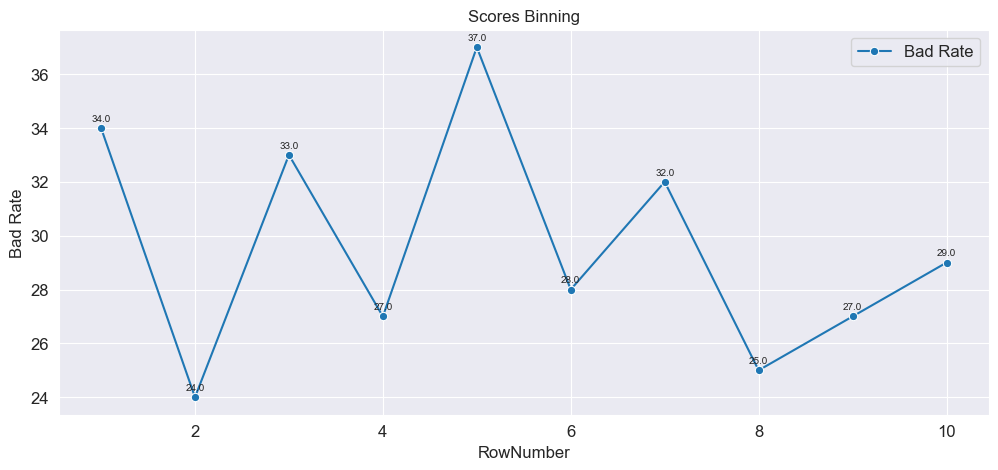

,RowNumber,Bin,Count,Bad,Good,Bad Rate,Good Rate
0,1,"(302.547, 351.123]",100,34,66,34.0,66.0
1,2,"(351.123, 397.4]",100,24,76,24.0,76.0
2,3,"(397.4, 454.525]",100,33,67,33.0,67.0
3,4,"(454.525, 508.301]",100,27,73,27.0,73.0
4,5,"(508.301, 573.244]",100,37,63,37.0,63.0
5,6,"(573.244, 624.781]",100,28,72,28.0,72.0
6,7,"(624.781, 678.95]",100,32,68,32.0,68.0
7,8,"(678.95, 739.927]",100,25,75,25.0,75.0
8,9,"(739.927, 794.79]",100,27,73,27.0,73.0
9,10,"(794.79, 849.845]",100,29,71,29.0,71.0


In [10]:
# Perform score binning
binning_result = metrics.score_binning(data, bins=10, binning_type=1, save=False)

In [12]:
# Analyze approval rate trends over time (weekly period)
approval_rate_trend = metrics.approval_rate_trend(data, period='W', score_cutoff=500, save=False)



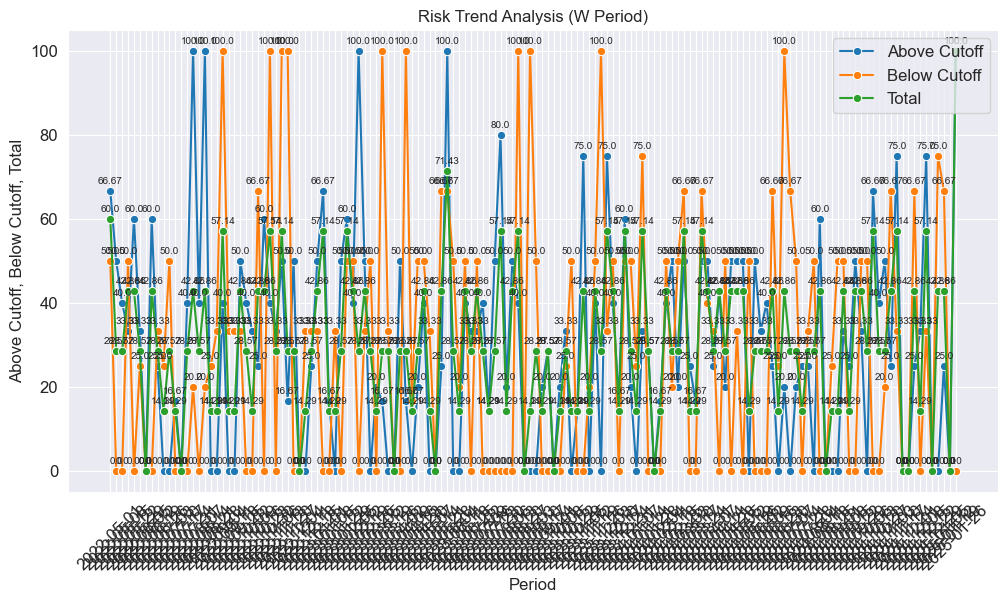

,Period,Total Risk (%),Above Cutoff Risk (%),Below Cutoff Risk (%)
0,2022-05-01,60.000000,66.666667,50.000000
1,2022-05-08,28.571429,50.000000,0.000000
2,2022-05-15,28.571429,40.000000,0.000000
3,2022-05-22,42.857143,33.333333,50.000000
4,2022-05-29,42.857143,60.000000,0.000000
...,...,...,...,...
139,2024-12-29,0.000000,0.000000,0.000000
140,2025-01-05,42.857143,0.000000,75.000000
141,2025-01-12,42.857143,25.000000,66.666667
142,2025-01-19,0.000000,0.000000,0.000000


In [8]:
# Perform risk trend analysis
risk_trend = metrics.risk_trend_analysis(data, period='W', score_cutoff=500, save=False)


In [9]:
class TestMetrics(unittest.TestCase):
    def setUp(self):
        """
        Set up test data and a Metrics instance for testing.
        """
        self.test_data = pd.DataFrame({
            'Scores': [800, 750, 700, 650, 600],
            'Actual': [1, 1, 0, 0, 1],
            'Date': pd.date_range(start='2023-01-01', periods=5, freq='D')
        })
        self.metrics = Metrics(Credit_score='Scores', Target='Actual', Date_column='Date')

    def test_cutoff(self):
        """
        Test the cutoff calculation.
        """
        cutoff, good_perc, bad_perc, approve_rate, bad_under_cutoff = self.metrics.cutoff(self.test_data, approved_Rate=60)

        # Expected cutoff is 650 (top 60% of sorted scores)
        self.assertEqual(cutoff, 650)
        self.assertAlmostEqual(good_perc, 50.0, places=2)  # 2 goods above cutoff, 2 goods in total
        self.assertAlmostEqual(bad_perc, 50.0, places=2)  # 2 bads above cutoff, 2 bads in total
        self.assertAlmostEqual(approve_rate, 80.0, places=2)  # 4 rows (800, 750, 700, 650) out of 5
        self.assertAlmostEqual(bad_under_cutoff, 0.0, places=2)  # No bads below the cutoff

    def test_cutoff_invalid_rate(self):
        """
        Test the cutoff method with invalid approval rate.
        """
        with self.assertRaises(ValueError):
            self.metrics.cutoff(self.test_data, approved_Rate=150)

    def test_cutoff_missing_columns(self):
        """
        Test the cutoff method with missing columns.
        """
        data = self.test_data.drop(columns=['Scores'])
        with self.assertRaises(KeyError):
            self.metrics.cutoff(data, approved_Rate=50)

    def test_cutoff_report(self):
        """
        Test the cutoff report generation.
        """
        result = self.metrics.cutoff_report(self.test_data, step=20)

        self.assertFalse(result.dataframe.empty)
        self.assertIn('Cutoff Score', result.dataframe.columns)

        # Mock the plot function to verify it is callable
        result._plot_func = MagicMock()
        result.plot()
        result._plot_func.assert_called_once()

    def test_score_binning(self):
        """
        Test the Score_Binning method.
        """
        result = self.metrics.Score_Binning(self.test_data, bins=3, binning_type=1)

        self.assertFalse(result.dataframe.empty)
        self.assertIn('Bin', result.dataframe.columns)

        # Verify the number of bins created
        self.assertEqual(len(result.dataframe['Bin'].unique()), 3)

        # Mock the plot function to verify it is callable
        result._plot_func = MagicMock()
        result.plot()
        result._plot_func.assert_called_once()

    def test_approval_rate_trend(self):
        """
        Test the approval rate trend method.
        """
        result = self.metrics.approval_rate_trend(self.test_data, period='D', score_cutoff=700)

        self.assertFalse(result.dataframe.empty)
        self.assertIn('Approval Rate (%)', result.dataframe.columns)

        # Mock the plot function to verify it is callable
        result._plot_func = MagicMock()
        result.plot()
        result._plot_func.assert_called_once()

    def test_risk_trend_analysis(self):
        """
        Test the risk trend analysis method.
        """
        result = self.metrics.risk_trend_analysis(self.test_data, period='D', score_cutoff=700)

        self.assertFalse(result.dataframe.empty)
        self.assertIn('Total Risk (%)', result.dataframe.columns)

        # Mock the plot function to verify it is callable
        result._plot_func = MagicMock()
        result.plot()
        result._plot_func.assert_called_once()

if __name__ == "__main__":
    suite = unittest.TestLoader().loadTestsFromTestCase(TestMetrics)
    unittest.TextTestRunner(verbosity=2).run(suite)


test_approval_rate_trend (__main__.TestMetrics.test_approval_rate_trend)
Test the approval rate trend method. ... ok
test_cutoff (__main__.TestMetrics.test_cutoff)
Test the cutoff calculation. ... ok
test_cutoff_invalid_rate (__main__.TestMetrics.test_cutoff_invalid_rate)
Test the cutoff method with invalid approval rate. ... ok
test_cutoff_missing_columns (__main__.TestMetrics.test_cutoff_missing_columns)
Test the cutoff method with missing columns. ... ok
test_cutoff_report (__main__.TestMetrics.test_cutoff_report)
Test the cutoff report generation. ... ok
test_risk_trend_analysis (__main__.TestMetrics.test_risk_trend_analysis)
Test the risk trend analysis method. ... ok
test_score_binning (__main__.TestMetrics.test_score_binning)
Test the Score_Binning method. ... ok

----------------------------------------------------------------------
Ran 7 tests in 0.054s

OK
